In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

from ipywidgets import interact

In [2]:
def step(t):
    return 4*np.ones_like(t)


def sinusoidal(t):
    return 4*np.sin(3*t)


def simulate_mrac(reference_signal=step, time_horizon=10.):
    # Ideal response gains.
    kr_star = 4/3
    ky_star = -5/3

    # Adaptation gains.
    γ = 2.

    def simulation_ode(t, state_refstate_controlgains):
        y, y_m, kr, ky = state_refstate_controlgains
        r = reference_signal(t)
        u = kr*r + ky*y
        e = y - y_m
        dy_m = 4*r - 4*y_m
        dy = 3*u + y
        dkr = -γ*e*r
        dky = -γ*e*y
        return np.array([dy, dy_m, dkr, dky])

    sol = solve_ivp(simulation_ode, (0., time_horizon),
                    np.array([0., 0., 0., 0.]),
                    t_eval=np.linspace(0, time_horizon, 400))

    plt.figure(figsize=(20, 10))
    y, y_m, kr, ky = sol.y
    plt.plot(sol.t, y, label = 'y')
    plt.plot(sol.t, y_m, label = 'y_m')
    plt.plot(sol.t, reference_signal(sol.t), "--", label="reference")
    plt.legend(fontsize=20)

    plt.figure(figsize=(20,10))
    plt.plot(sol.t, kr, label = 'kr')
    plt.plot(sol.t, ky, label = 'ky') 
    plt.plot(sol.t, [kr_star]*len(sol.t), '--', label = 'kr*')
    plt.plot(sol.t, [ky_star]*len(sol.t), '--', label = 'ky*')       
    plt.legend(fontsize=20)

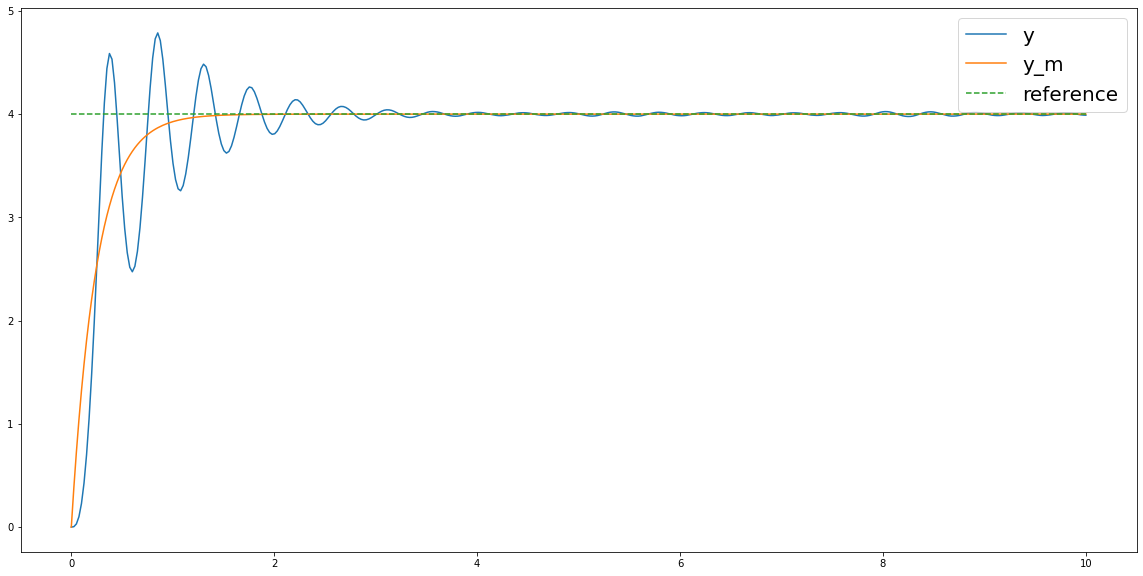

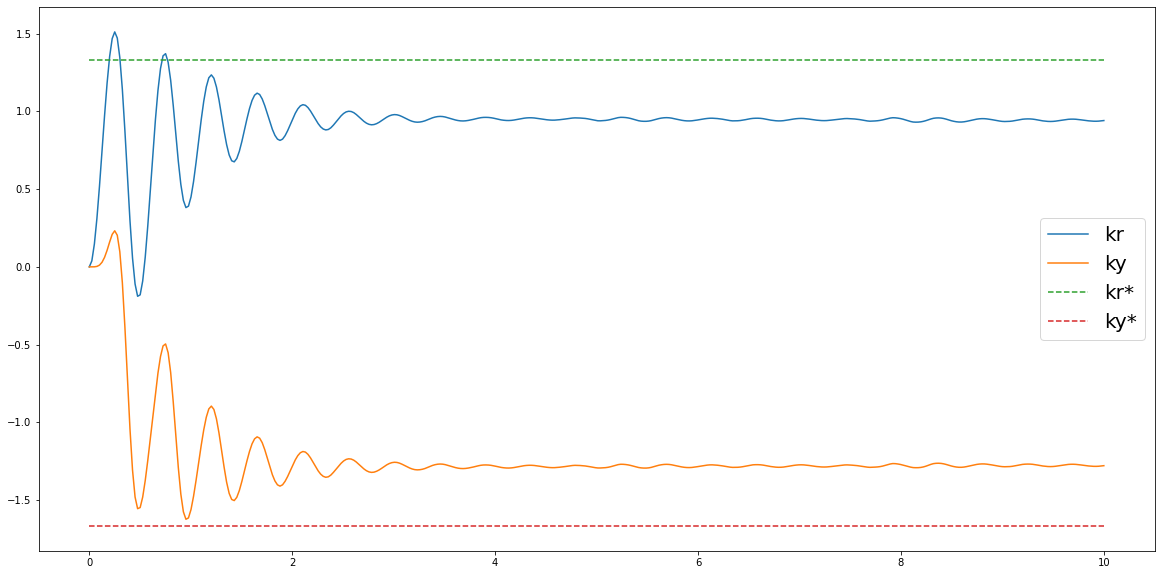

In [3]:
simulate_mrac(reference_signal=step, time_horizon=10.)

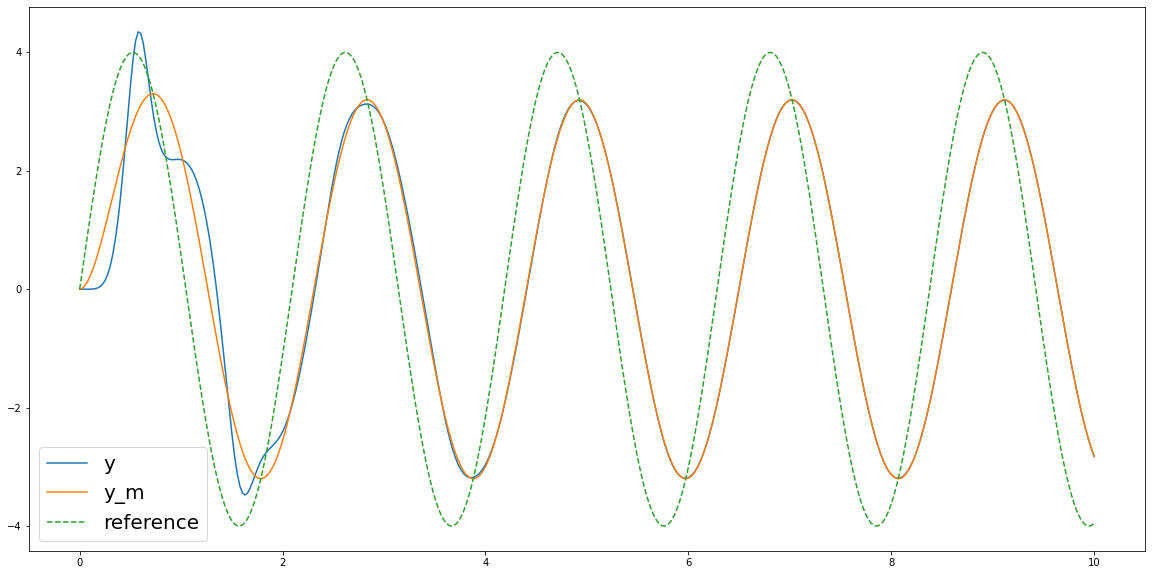

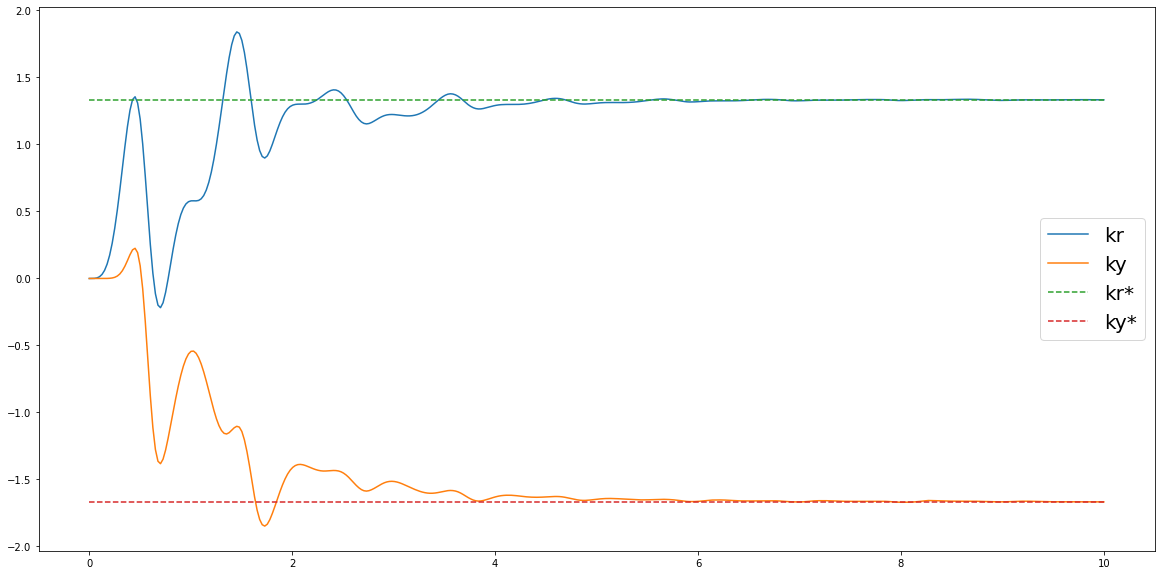

In [4]:
simulate_mrac(reference_signal=sinusoidal, time_horizon=10.)